In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df_telco = pd.read_csv('Downloads/Project 1/telco.csv') 

## Data Overview
- Total number of rows & numbers in the dataset
- The percentage of missing values of each column
- Drop some irrelevant columns

In [93]:
# Drop some irrelevant columns

fields = ['Under 30','Senior Citizen','Married','Dependents','Country','State','Zip Code','Latitude','Longitude','Population','Quarter','Referred a Friend',
          'Customer Status','Churn Score','Churn Reason','Paperless Billing','Total Refunds','Total Extra Data Charges','Total Long Distance Charges']

df_telco_new = df_telco.drop(fields, axis=1)

In [95]:
df_telco_new.head()

,Customer ID,Gender,Age,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,Churn Label,CLTV,Churn Category
0,8779-QRDMV,Male,78,0,Los Angeles,0,1,NaN,No,0.00,...,No,Month-to-Month,Bank Withdrawal,39.65,39.65,59.65,3,Yes,5433,Competitor
1,7495-OOKFY,Female,74,1,Los Angeles,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Credit Card,80.65,633.30,1024.10,3,Yes,5302,Competitor
2,1658-BYGOY,Male,71,3,Los Angeles,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Bank Withdrawal,95.45,1752.55,1910.88,2,Yes,3179,Competitor
3,4598-XLKNJ,Female,78,1,Inglewood,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Bank Withdrawal,98.50,2514.50,2995.07,2,Yes,5337,Dissatisfaction
4,4846-WHAFZ,Female,80,1,Whittier,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Bank Withdrawal,76.50,2868.15,3102.36,2,Yes,2793,Price


In [97]:
# % missing data in the dataset
for col in df_telco_new.columns:
    missing_data = df_telco_new[col].isna().sum()
    if missing_data > 0:
        missing_percent = (missing_data/len(df_telco_new))*100 
        print(f'Column {col}: {missing_data} ({missing_percent:.2f}%) missing values')

Column Offer: 3877 (55.05%) missing values
Column Internet Type: 1526 (21.67%) missing values
Column Churn Category: 5174 (73.46%) missing values


## Feature Classification: Categorical vs Numerical
- Change the datatype of these columns to 'Category' datatype, instead of 'Object' datatype

In [100]:
features = ['Gender','Offer','Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan',
            'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Payment Method','Churn Label','Churn Category','Satisfaction Score']

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
        
convert_cat(df_telco_new, features)

## Statistics

### Numerical features

In [104]:
df_telco_new.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Revenue,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,3034.379056,4400.295755
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,2865.204542,1183.057152
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,21.360000,2003.000000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,605.610000,3469.000000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,2108.640000,4527.000000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,4801.145000,5380.500000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,11979.340000,6500.000000


- There are no missing values ​​in numerical feature columns of this dataset (`count = 7043`)
- `Age`: maximu =s 80 ande minimu =  19, 50% of customers are in the agebrackete [32,60]
- `Tenure in Months`: max=72, min=1 and median=29
- `Total Charges`: max=8684.8 and min=18.8
- `CLTV`: max=65000 and min=2003

### Categorical Features

In [108]:
df_telco_new.describe(include = 'category')

,Gender,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Satisfaction Score,Churn Label,Churn Category
count,7043,3166,7043,7043,7043,5517,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,2,5,2,2,2,3,2,2,2,2,2,2,2,2,3,3,5,2,5
top,Male,Offer B,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,3,No,Competitor
freq,3555,824,6361,4072,5517,3035,5024,4614,4621,4999,4336,4311,4555,4745,3610,3909,2665,5174,841


- `Offer`: `count` = 3166, there are 3877 (55.05%) missing values
- `Churn Category`: `count`= 1869, there are 5174 (73.46%) missing values
- Most of the service users are `Male` (3555/7043)
- Most of them register to use `Phone Service`, `Internet Service`. However, the number of registrations for the accompanying services of `Internet Service` is less.
- Most of them register for `Month-to-Month` contract, the remaining ratio is for `One Year` & `Two Year`
- The main reason for churisg was `Competitor`

## Univariate Distribution 

### Numerical features

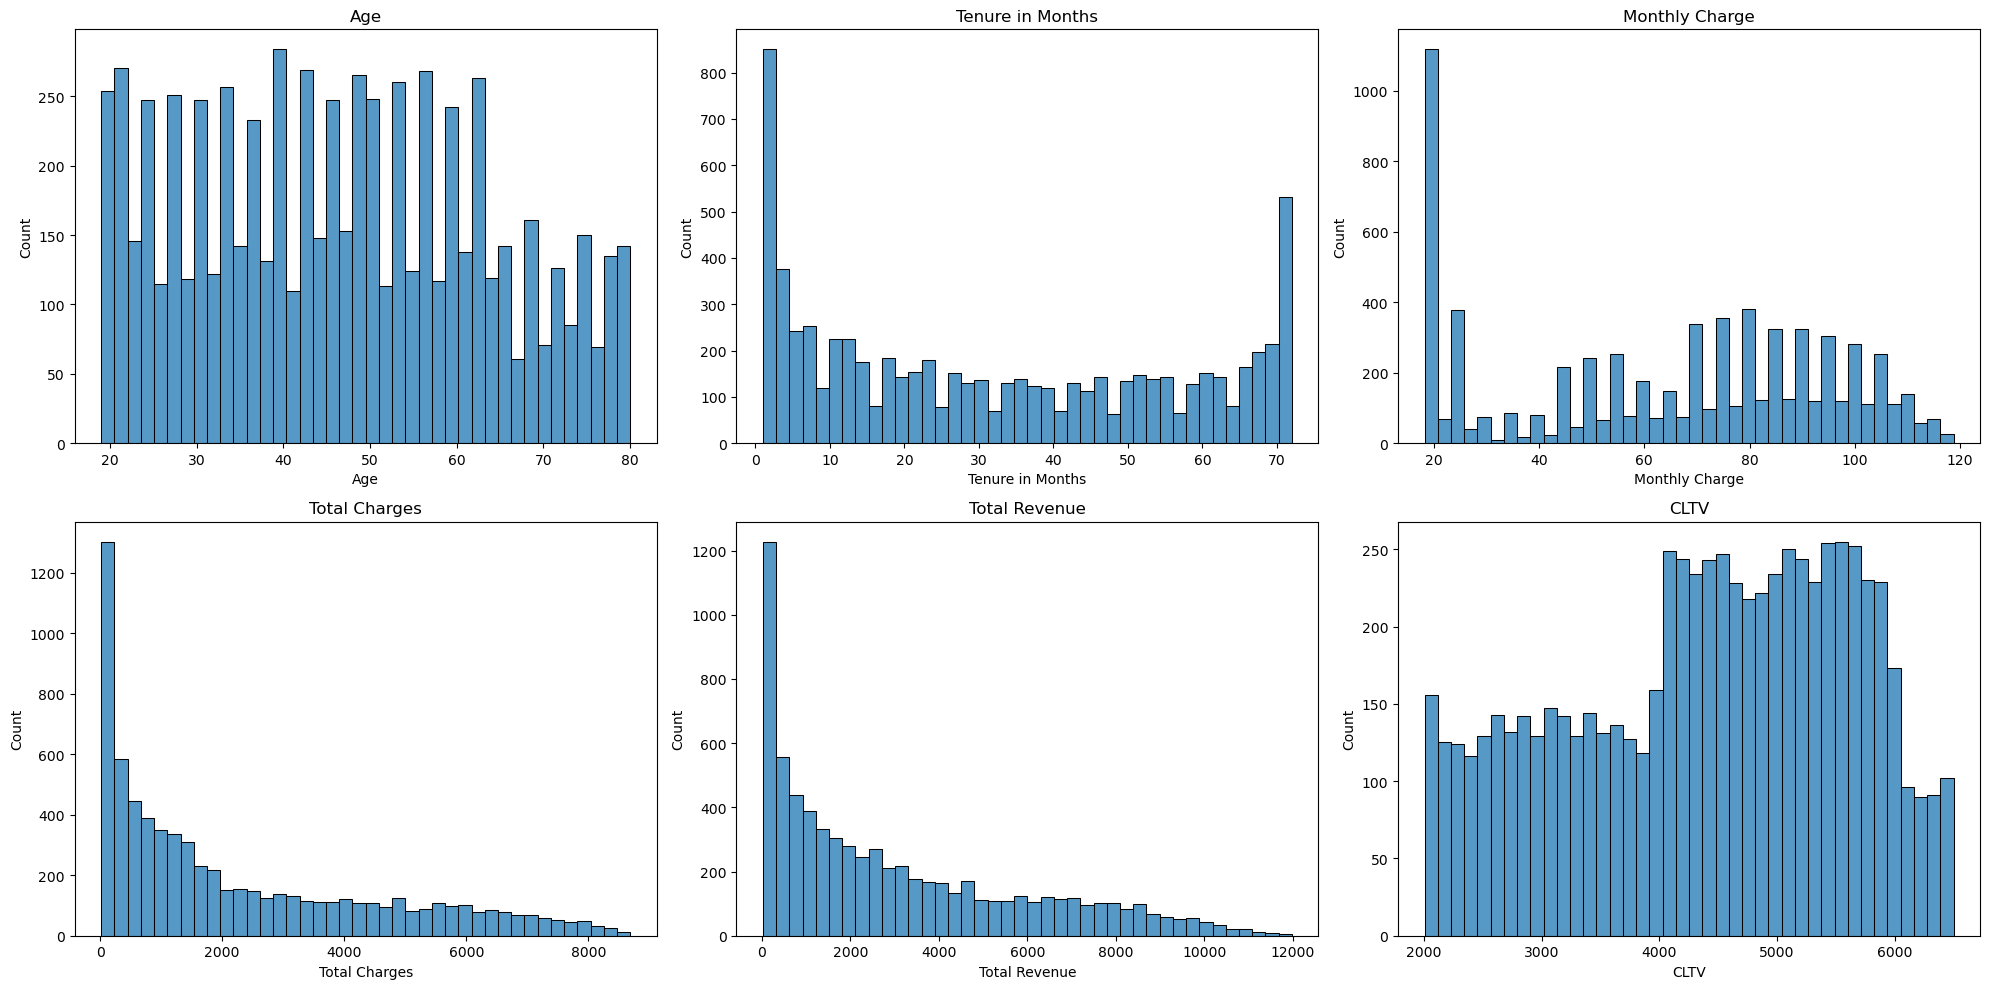

In [113]:
# using for-loop to visualize multiple chart at the same time

num_columns = ['Age','Tenure in Months','Monthly Charge','Total Charges','Total Revenue','CLTV']

n_rows=2
n_cols=3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,10))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(num_columns):
            ax_i = ax[r,c]
            sns.histplot(df_telco_new, x=num_columns[i], ax=ax_i, bins=40)
            ax_i.set(title=(f'{num_columns[i]}'))
            
plt.tight_layout();

- Column `Age`, customers are mostly in age bracket [20,65], while the range over 65 is less
h `Tenure in Months`<10is dominante. However, there is still a large number of long-term customers (`Tenure in Months` > 70)
- This leads to `Monthly Charge`,`Total Charges` and `Total Revenue` having the majority of values ​​in the first bins, the later bins have less data distribution
- `CLTVthe most amount of money customers spend on islue in range (4000,600ber

### Categorical Features

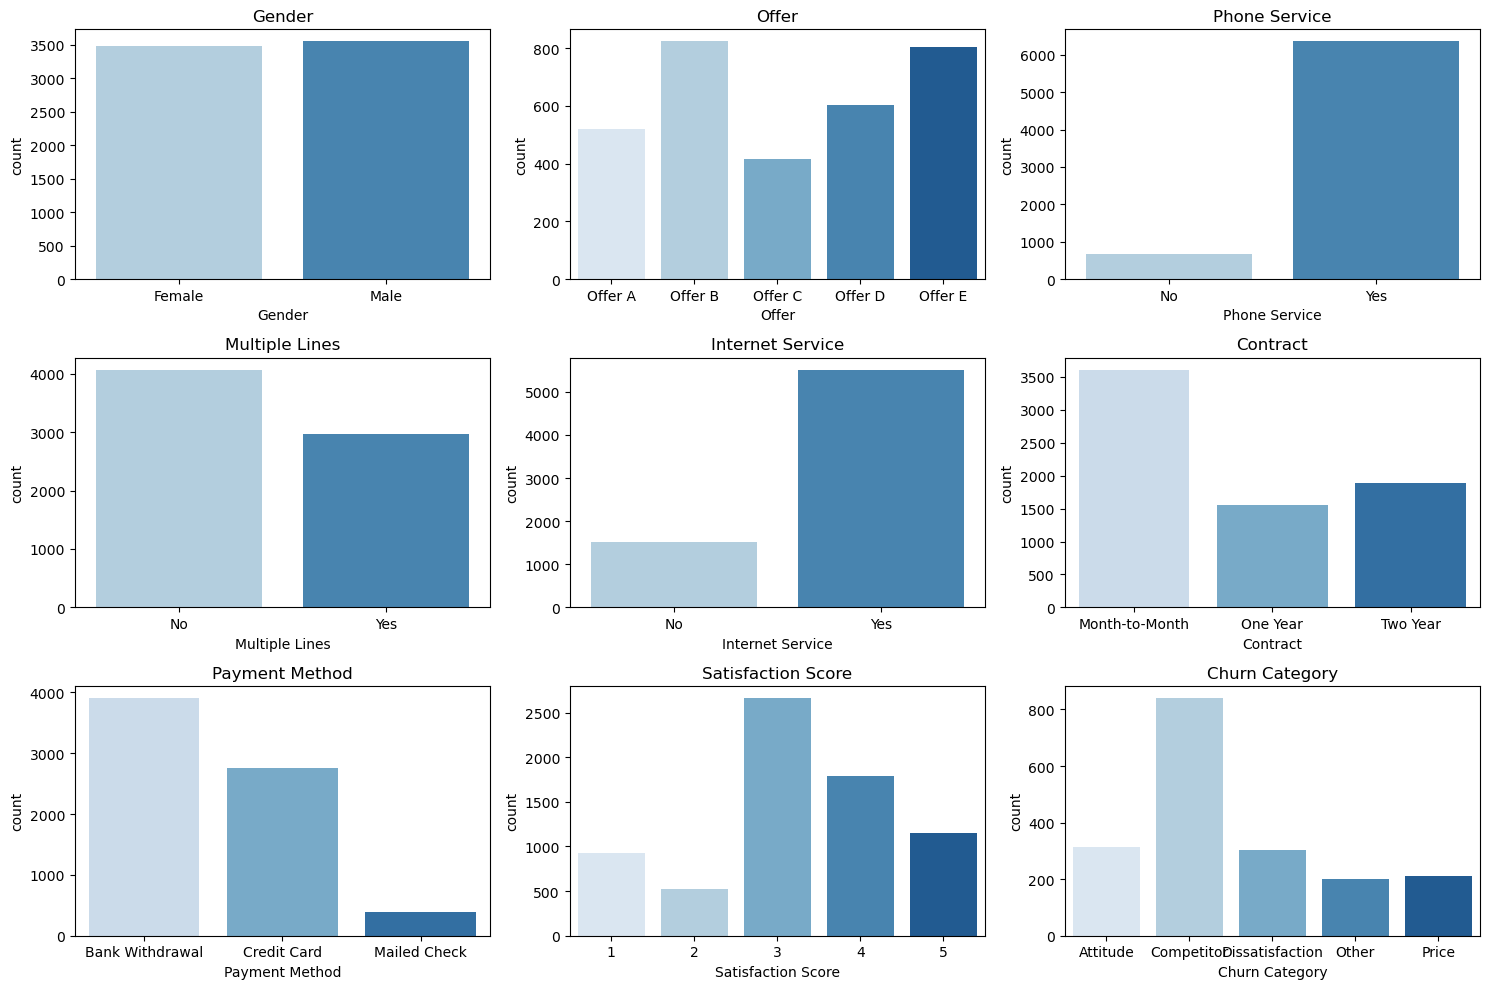

In [117]:
cat_columns = ['Gender','Offer','Phone Service','Multiple Lines','Internet Service','Contract','Payment Method','Satisfaction Score','Churn Category']

no_rows = 3
no_cols = 3

fig, ax = plt.subplots(no_rows, no_cols, figsize=(15,10))

for row in range(0,no_rows):
    for col in range(0,no_cols):
        i = row*no_cols + col
        if i < len(cat_columns):
            ax_i = ax[row,col]
            sns.countplot(df_telco_new, x=cat_columns[i], hue=cat_columns[i],ax=ax_i, legend=False, palette='Blues')
            ax_i.set(title=(f'{cat_columns[i]}'))

plt.tight_layout();

- The number of `Male` customers is slightly higher than that of `Female`
- `Offer B` & `Offer E` are morepopulars than the other offers
- Most of the customers are registered for `Phone Service` & `Internet Service`
- `Month-to-Month` contract dominant, compared tohan `One Year` and `Two Year`
- The number of customers who rated 3-5 in `Satisfaction Score` is still greater than 1-2
- The main reason why customer churned is `Competition` in `Churn Category`

## Correlation

### Correlation Numerical Features vs `Churn Label`

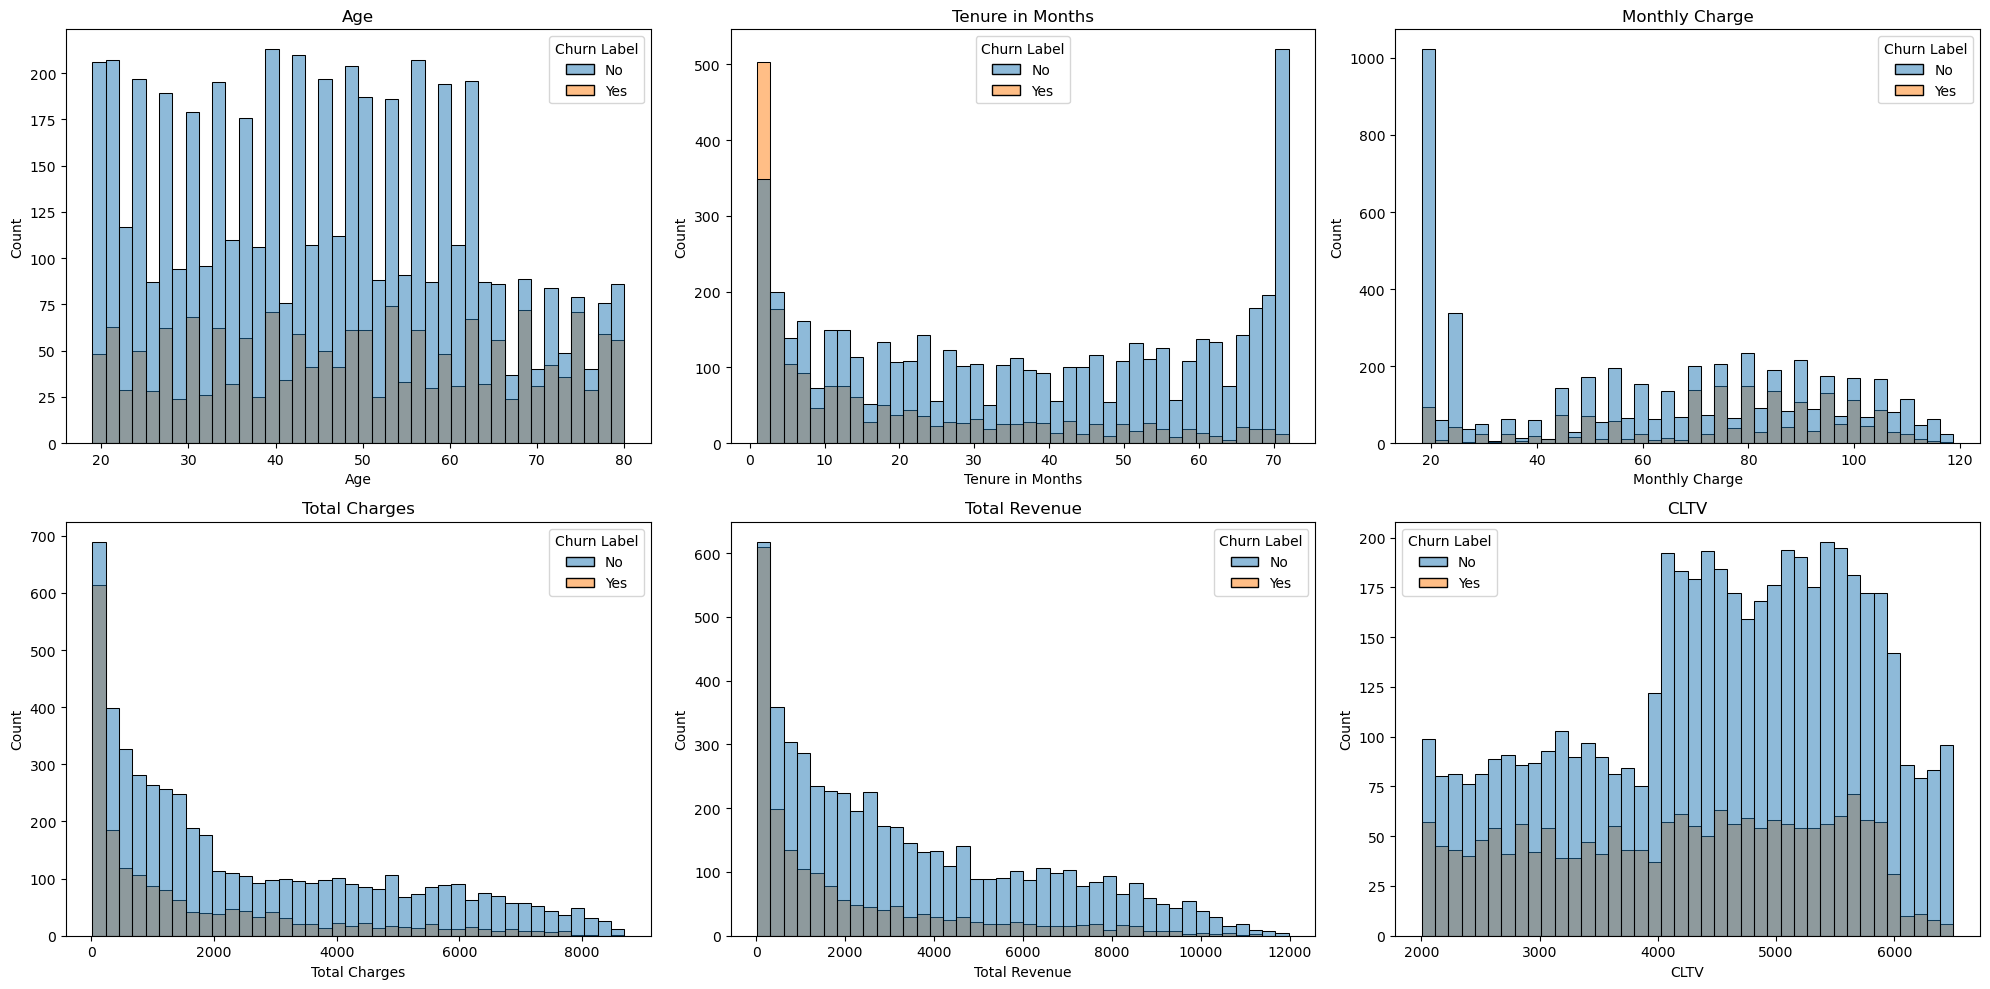

In [122]:
num_columns = ['Age','Tenure in Months','Monthly Charge','Total Charges','Total Revenue','CLTV']

n_rows=2
n_cols=3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,10))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(num_columns):
            ax_i = ax[r,c]
            sns.histplot(df_telco_new, x=num_columns[i],hue='Churn Label', ax=ax_i, bins=40, color='yellow')
            ax_i.set(title=(f'{num_columns[i]}'))
            
plt.tight_layout();

### Correlating Categorical Features vs `Churn Label`

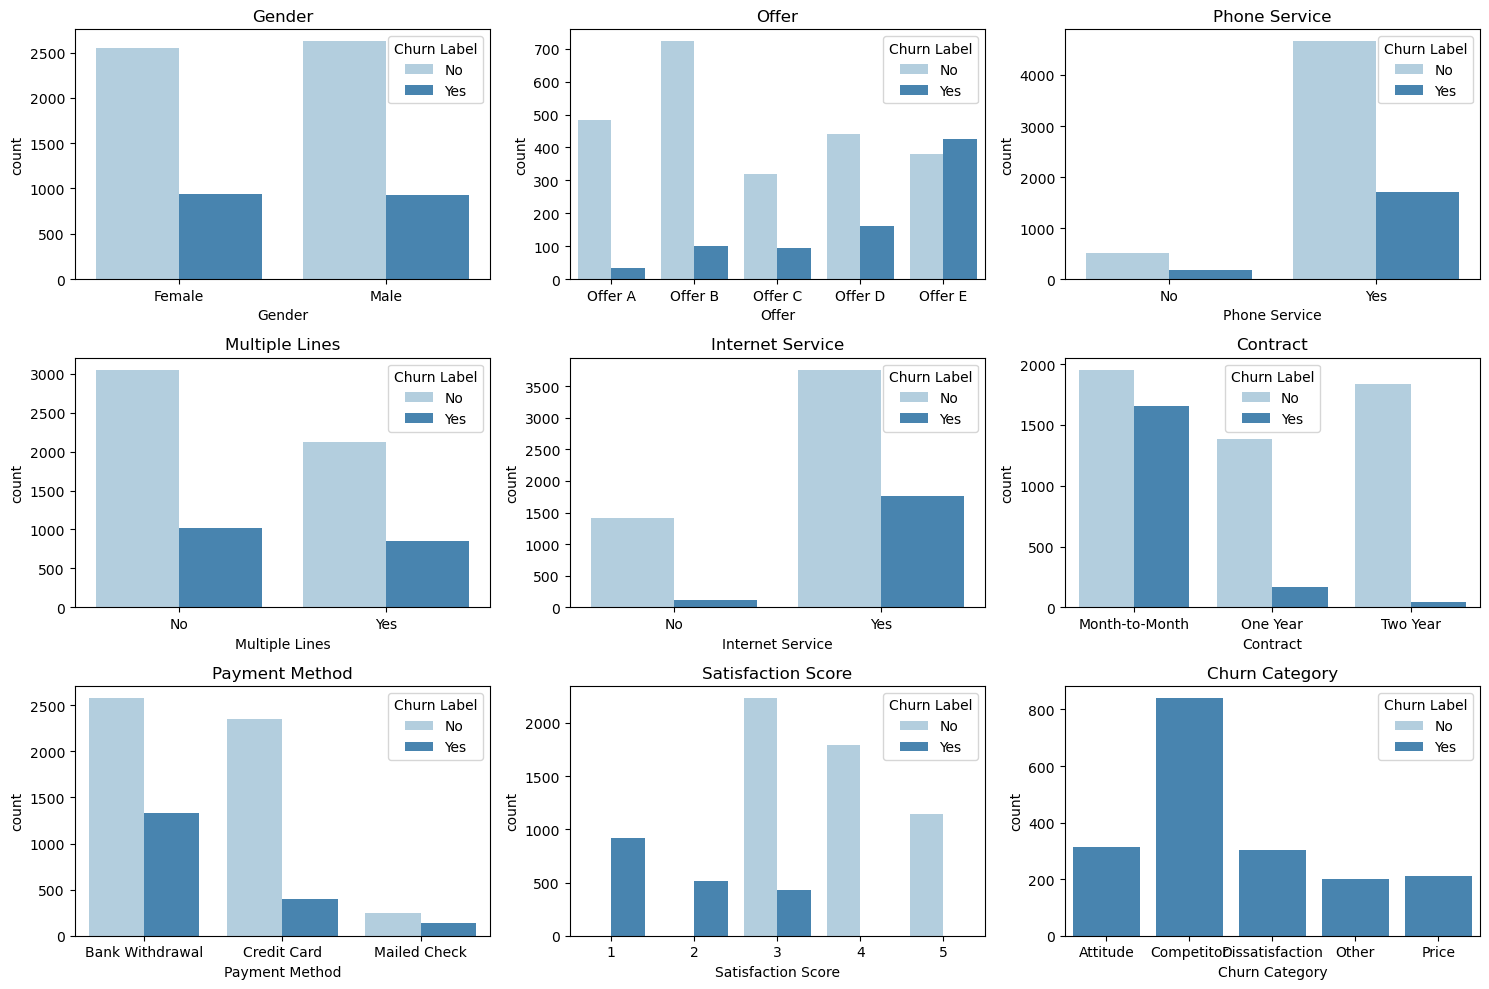

In [125]:
cat_columns = ['Gender','Offer','Phone Service','Multiple Lines','Internet Service','Contract','Payment Method','Satisfaction Score','Churn Category']

no_rows = 3
no_cols = 3

fig, ax = plt.subplots(no_rows, no_cols, figsize=(15,10))

for row in range(0,no_rows):
    for col in range(0,no_cols):
        i = row*no_cols + col
        if i < len(cat_columns):
            ax_i = ax[row,col]
            sns.countplot(df_telco_new, x=cat_columns[i], hue='Churn Label',ax=ax_i, palette='Blues')
            ax_i.set(title=(f'{cat_columns[i]}'))

plt.tight_layout();

- Just tiny difference in churned customer rate between `Gender`
- While `Offer E` has higher churned customer rate than non-churned customers,`Offer B` has reversed rate, which `No` is much more higher than `Yes`e
- `Month-to-Month` contract has highest customer churn rate compared to `One Year` and `Two Year`
- `Satisfaction Score` = (1,2) has 100% customer churn rate

## Handling Missing data

- As I observed the dataset, `Offer` is related to `Tenure in Months`, which means the longer the customer has been with the company, the higher the `Offer`

- Column `Offer` has 3877 (55.05%) missing values, so I'm filling the missing values with `mode` based on `Tenure in Months`. The reason why I'm using this technique because with new customers, company wants to attract and keep them as long as possible, while with loyal customers, it's more effective to keep and maximize customer's value than attracting a new one.

In [ ]:
# Define the function to categorize Offer_Category
def categorize_offer(tenure):
    if 1 <= tenure < 10:
        return 'E'
    elif 10 <= tenure <= 23:
        return 'D'
    elif 24 <= tenure <= 39:
        return 'C'
    elif 40 <= tenure <= 65:
        return 'B'
    elif 66 <= tenure <= 72:
        return 'A'
    else:
        return None

# Apply the function to create the Offer_Category column
df_telco_new['Offer_Category'] = df_telco_new['Tenure in Months'].apply(categorize_offer)

def fill_offer(row):
    if pd.isnull(row['Offer']):
        offer_mapping = {
            'A': 'Offer A',
            'B': 'Offer B',
            'C': 'Offer C',
            'D': 'Offer D',
            'E': 'Offer E'
        }
        return offer_mapping.get(row['Offer_Category'], None)
    return row['Offer']

df_telco_new['Offer'] = df_telco_new.apply(fill_offer, axis=1)

In [ ]:
# Drop 'Offer_Category'
telco_data = df_telco_new.drop('Offer_Category', axis=1)

In [ ]:
telco_data.to_csv('telco_data.csv', index=False)